Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.1) 나무위키 최신 변경 문서의 키워드 분석

### 바로가기

- [<Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기](#<Step1.-크롤링>-:-크롤링으로-웹-데이터-가져오기)
    - [BeautifulSoup을 이용한 웹 크롤링]
    - [나무위키 최근변경 데이터 크롤링]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [말뭉치 만들기]
    - [konlpy를 이용한 키워드 추출]
    - [키워드 가다듬기]
- [<Step3. 시각화> : 워드 클라우드 시각화](#<Step3.-시각화>-:-워드-클라우드-시각화)
    - [pytagcloud 사용하기]
    - [나무위키 키워드 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

### [BeautifulSoup을 이용한 웹 크롤링]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install requests`
    - (env_name) `pip install beautifulsoup4`
    - (env_name) `pip install lxml`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [1]:
!pip install requests beautifulsoup4 lxml

-----

##### 페이지 리스트 가져오기

In [2]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [7]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%ED%8B%80:%ED%83%9C%EA%B3%A0%EC%9D%98%20%EB%8B%AC%EC%9D%B8%2010%EB%A0%99%20%EC%A4%91%EC%83%81%EC%9C%84
https://namu.wiki/w/%EA%B7%B8%EB%A0%98%EB%A6%B0%20%EC%A3%BC%EC%8B%9D%ED%9A%8C%EC%82%AC/%EC%BA%90%EB%A6%AD%ED%84%B0
https://namu.wiki/w/%EC%A0%9C21%EB%8C%80%20%EA%B5%AD%ED%9A%8C%EC%9D%98%EC%9B%90%20%EC%84%A0%EA%B1%B0/%ED%9B%84%EB%B3%B4%EC%9E%90
https://namu.wiki/w/%EC%8B%A0%EC%9A%A9%EC%9A%B0
https://namu.wiki/w/%EB%8B%B9%ED%98%91%EC%9C%84%EC%9B%90%EC%9E%A5/%EB%AA%A9%EB%A1%9D


-----

##### 페이지내 텍스트 구조 확인

In [9]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

그렘린 주식회사/캐릭터 


보드 게임PC 게임


   관련 문서: 그렘린 주식회사/카드, 그렘린 주식회사/지점1. 개요2. 기술자3. 정치인4. 경영자5. 빈민6. 도박사7. 악마8. 은행가9. 수집가10. 비밀요원11. 상인12. 판사13. 도둑14. 관련 문서그렘린 주식회사에서 세션을 만들 때 3가지 중 하나로 캐릭터 선택 방법을 고를 수 있는데, '전체 세트'는 세션 대기실에서 12가지 직업 중 하나를 고를 수 있지만 다른 사람이 먼저 선택했으면 해당 직업을 고를 수 없다. '무작위'는 선택권 없이 아무 직업으로 시작하고, '무작위 세트'는 멀티플레이 세션에서 추가된 요소로 참여한 플레이어 수마다 일정 숫자의 무작위의 직업군이 주어지고 그 중 하나를 고르는 방식이다. 예를 들어 2인 대전이면 6개의, 3인 대전이면 4개의, 4인 대전이면 3개의, 6인 대전이면 2개의 무작위 캐릭터 세트에서 하나를 고를 수 있다. 5인의 경우는 2명이 3개의, 3명이 2개의 무작위 캐릭터 세트에서 고를 수 있다. 만약 자신의 세트가 마음에 들지 않으면 세트 하단에 '무작위 캐릭터 선택' 메뉴를 눌러서 나머지 플레이어의 세트 중 선택되지 않은 직업 하나를 무작위로 골라서 시작할 수 있다. 특수능력 사용유무도 정할 수 있지만 능력 없이 게임하면 흥미를 잃기 때문에 대부분 특수능력을 켜놓고 만든다. 캐릭터 DLC는 스킨이나 이모티콘 등의 부가요소만 추가되고 새로운 직업이나 다른 능력 같은건 없으니 가볍게 즐기려면 굳이 살 필요가 없다. 일정 주기로 캐릭터 특수능력도 패치하여 밸런스 조정을 하고 있다.각 캐릭터마다 턴 시작 우선권이 고정되어 있으며 이는 캐릭터 세트에서 초상화 하단 숫자로 순위를 알 수 있다. 캐릭터 설명은 턴 우선권 기준이고 특수능력 기준으로 서술하였지만, 특수능력을 너무 의식하면서 운용하면 오히려 손해니 너무 얽매일 필요 없이 유연한 플레이를 권장한다.프로토타입: 세션을 시작할 때 톱니바퀴 1개를 얻습니다.월급: 공장을 방문할 때마다 50골드를 얻습니다.황

-----

### [나무위키 최근변경 데이터 크롤링]

In [13]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [14]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,틀:태고의 달인 10렙 중상위,태고의 달인,태고의 달인 비공식 난이도표★10 중상위 疾風怒濤 ★10極圏 ★10 怒槌 ★10Sc...
1,그렘린 주식회사/캐릭터,보드 게임PC 게임,"관련 문서: 그렘린 주식회사/카드, 그렘린 주식회사/지점1. 개요2. 기술자3..."
2,제21대 국회의원 선거/후보자,대한민국 국회의원 선거,상위 문서: 제21대 국회의원 선거1. 더불어민주당1.1. 지역구1.2. 비례...
3,신용우,한국 남성 성우/ㅅ1976년 출생2003년 데뷔대한민국의 가톨릭 신자거창 신씨,이름 신용우 (Shin Yongwoo) 출생 1976년 3월 19일[1] (43세)...
4,당협위원장/목록,대한민국의 정당대한민국의 정치인,상위 문서: 당협위원장1. 개요2. 원내정당별 당협위원장 목록2.1. 서울특별...


-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [15]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [16]:
print(text_cleaning(df['content_text'][0]))

태고의 달인 비공식 난이도표 중상위                                                         


In [17]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,틀태고의 달인 렙 중상위,태고의 달인,태고의 달인 비공식 난이도표 중상위 ...
1,그렘린 주식회사캐릭터,보드 게임 게임,관련 문서 그렘린 주식회사카드 그렘린 주식회사지점 개요 기술자 정치인 경영자 빈...
2,제대 국회의원 선거후보자,대한민국 국회의원 선거,상위 문서 제대 국회의원 선거 더불어민주당 지역구 비례대표 미래통합당 지역구 민...
3,신용우,한국 남성 성우ㅅ년 출생년 데뷔대한민국의 가톨릭 신자거창 신씨,이름 신용우 출생 년 월 일 세 신체 혈액형 형 본관 거창 신씨 종교 천주교세...
4,당협위원장목록,대한민국의 정당대한민국의 정치인,상위 문서 당협위원장 개요 원내정당별 당협위원장 목록 서울특별시 부산광역시 대구...


-----

### [말뭉치 만들기]

In [18]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

틀태고의 달인 렙 중상위 그렘린 주식회사캐릭터 제대 국회의원 선거후보자 신용우 당협위원장목록 스오 모모코아이돌 마스터 밀리언 라이브 시어터 데이즈 남동현 파일트렌트 레즈너 텀블러 김원준 데빌스타 박우진 멤버 간 케미 양심냉장고 쉔지 청계중학교 서울  나이츠 시즌 오락실인천폐업 이정후선수 경력 윤오 서울 가젯 리치도타  쟁반노래방기록실 틀마피아직업 영능 우한 마이너 갤러리 조선족 여론공작 의혹  에릭 영  우리은행    주차 한태선 런닝맨애니메이션  리그 오브 레전드 심즈 마을 오마이걸 포터 게이지 틀 멤버 후폐제유송 역붕괴  베이커리작전 마이너 갤러리 소녀전선작중 행적 오락실경기남부 거인족 홍콩 버스  딜탱 딜탱 쿠누기가오카 중학교 학년 반 마시마히메코 와 도시  세계관 수퍼비 재민 디지몬 리얼라이즈 레고시 틀유저박스지역대구 운외경음양사 명지대학교 대체역사물작품 티코 시리즈  종족최강전경기 목록년 카스팟팅 제레미 메네즈 아이스크림 패러독스 로이뮤드 파일 초콜릿 틀롯데제과의 제품아이스크림 배신의 귀신 장군 가르자 스포츠 관련 인물 문명 지형 엘리미네이션 챔버 모티스 포르투갈어 


-----

### [konlpy를 이용한 키워드 추출]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Install
        - 1. Java를 설치합니다. (https://java.com/ko/download/)
        - 2. c++ 컴파일러를 설치합니다. 
            - 윈도우 : `Microsoft Visual C++ 14.0` 설치 권장, https://visualstudio.microsoft.com/ko/downloads/
            - Mac OS : `Xcode` 설치 권장
            - Linux : `gcc` 설치 권장
        - 3. 아래와 같은 파이썬 패키지를 설치합니다. **konlpy 버전을 반드시 0.5.1로 해주어야 합니다. 2020년 현재(9월) 기준, 최신 버전 konlpy 에서는 일부 개발환경에서 자바 에러가 발생합니다.**
            - (env_name) `pip install konlpy==0.5.1`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`

In [13]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [14]:
count

Counter({'찌르레기': 16,
         '이명': 10,
         '분류': 53,
         '동물계': 3,
         '척삭동물문': 3,
         '강조': 24,
         '강목': 3,
         '참새목': 3,
         '속': 191,
         '종': 20,
         '멸종': 2,
         '위기': 37,
         '등급': 54,
         '관심': 48,
         '필요': 90,
         '과': 164,
         '조류': 2,
         '시베리아': 5,
         '사할린': 1,
         '섬': 29,
         '쿠릴': 1,
         '열도': 1,
         '만주': 6,
         '등지': 10,
         '서식': 6,
         '개요': 105,
         '특징': 49,
         '모티브': 37,
         '캐릭터': 289,
         '편집': 1206,
         '크기': 43,
         '약': 54,
         '머리': 119,
         '날개': 37,
         '빛': 34,
         '더': 458,
         '얼굴': 75,
         '눈': 97,
         '주위': 30,
         '깃털': 5,
         '몸': 92,
         '아래쪽': 3,
         '회색': 4,
         '꽁': 1,
         '편이': 174,
         '식물': 6,
         '열매': 44,
         '지렁이': 1,
         '먹이': 7,
         '인간': 67,
         '재배': 2,
         '곡물': 2,
         '닥치고': 1,
 

-----

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [15]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'편집': 1206, '때문': 1009, '롯데': 841, '파트': 809, '공격': 628, '경우': 624, '능력': 600, '정도': 596, '자신': 536, '사용': 532, '이후': 520, '사람': 519, '다른': 460, '경차': 410, '유닛': 407, '모습': 405, '미카즈키': 399, '다리우스': 398, '사실': 389, '등장': 377, '위해': 369, '일본': 355, '한국': 353, '이름': 344, '상대': 337, '시간': 329, '하나': 328, '대한': 326, '문제': 315, '상황': 315, '유물': 309, '생각': 303, '또한': 303, '그룹': 290, '캐릭터': 289, '가장': 285, '모두': 278, '당시': 264, '괴물': 263, '사망': 260, '스킬': 250, '시즌': 249, '제라툴': 248, '전투': 248, '가지': 248, '기본': 247, '시작': 245, '피해': 244, '쿼터': 244, '자체': 232, '상태': 230, '대학': 230, '방어': 222, '속도': 221, '실제': 217, '이유': 216, '이상': 216, '운영': 215, '사건': 214, '현재': 213, '관련': 212, '인물': 210, '바다': 209, '문서': 208, '평가': 205, '매우': 204, '건담': 204, '추가': 202, '공허': 201, '모든': 201, '주인공': 200, '전사': 198, '거의': 197, '시리즈': 194, '랩처': 194, '해당': 191, '보호': 191, '다만': 189, '게임': 186, '체력': 186, '경기': 186, '다시': 185, '이용': 184, '여기': 184, '서원대학교': 184, '챔피언': 183, '탈출': 183, '젤나가': 175, '내용': 17

-----

##### 불용어 제거

In [16]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [17]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [18]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'롯데': 841, '파트': 809, '공격': 628, '능력': 600, '사람': 519, '경차': 410, '유닛': 407, '미카즈키': 399, '다리우스': 398, '등장': 377, '위해': 369, '일본': 355, '한국': 353, '상대': 337, '대한': 326, '문제': 315, '유물': 309, '그룹': 290, '캐릭터': 289, '가장': 285, '당시': 264, '괴물': 263, '사망': 260, '스킬': 250, '시즌': 249, '제라툴': 248, '전투': 248, '가지': 248, '기본': 247, '시작': 245, '피해': 244, '쿼터': 244, '자체': 232, '상태': 230, '대학': 230, '방어': 222, '속도': 221, '실제': 217, '이유': 216, '운영': 215, '사건': 214, '현재': 213, '관련': 212, '바다': 209, '평가': 205, '건담': 204, '공허': 201, '주인공': 200, '전사': 198, '시리즈': 194, '랩처': 194, '보호': 191, '게임': 186, '체력': 186, '경기': 186, '다시': 185, '이용': 184, '서원대학교': 184, '챔피언': 183, '탈출': 183, '젤나가': 175, '편이': 174, '효과': 174, '마법': 174, '선수': 174, '부분': 170, '대해': 169, '기준': 166, '기술': 164, '지역': 164, '처음': 164, '회사': 163, '소환': 161, '본인': 161, '통해': 160, '역시': 160, '대부분': 159, '카드': 159, '파멸': 158, '라이언': 157, '활동': 156, '사령관': 155, '선원': 155, '존재': 154, '갑판': 154, '레이': 152, '초반': 152, '치어리더': 152, '지금':

-----

# <Step3. 시각화> : 워드 클라우드 시각화

### [pytagcloud 사용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install pytagcloud pygame simplejson`
- 그리고 아래와 같은 경로에 한글 폰트(예: NanumBarunGothic.ttf) 파일을 옮깁니다. 
    - Mac OS : /{anaconda_path}/envs/{env_name}/lib/python3.7/site-packages/pytagcloud/fonts
    - Windosw OS : \{anaconda_path}\envs\{env_name}\Lib\site-packages\pytagcloud\fonts
    - `폰트 다운로드 : http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf`
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행해줍니다. 그래도 아래의 코드가 실행되지 않는 경우는 다음과 같은 작업을 수행합니다.
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가하고 font.json 파일을 저장합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
        },

In [19]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


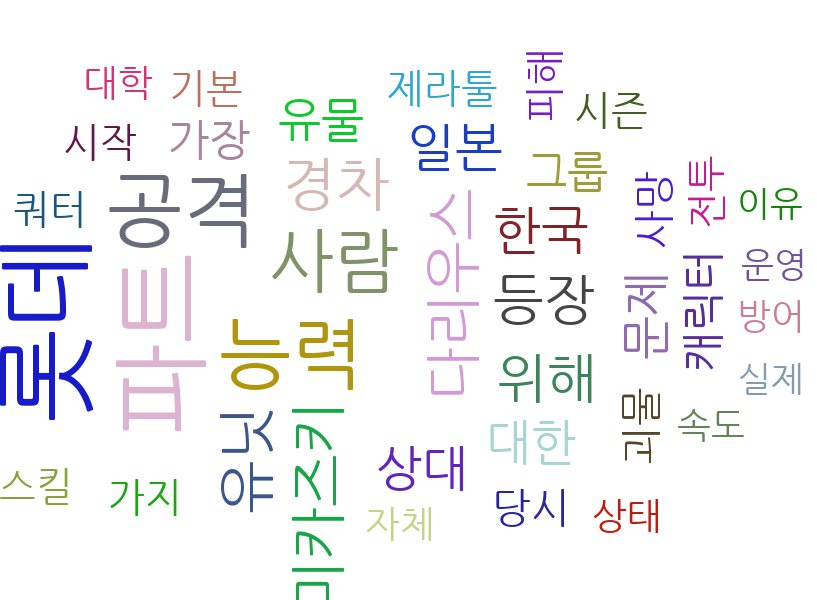

In [20]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### [나무위키 키워드 시각화]

##### 제목 키워드

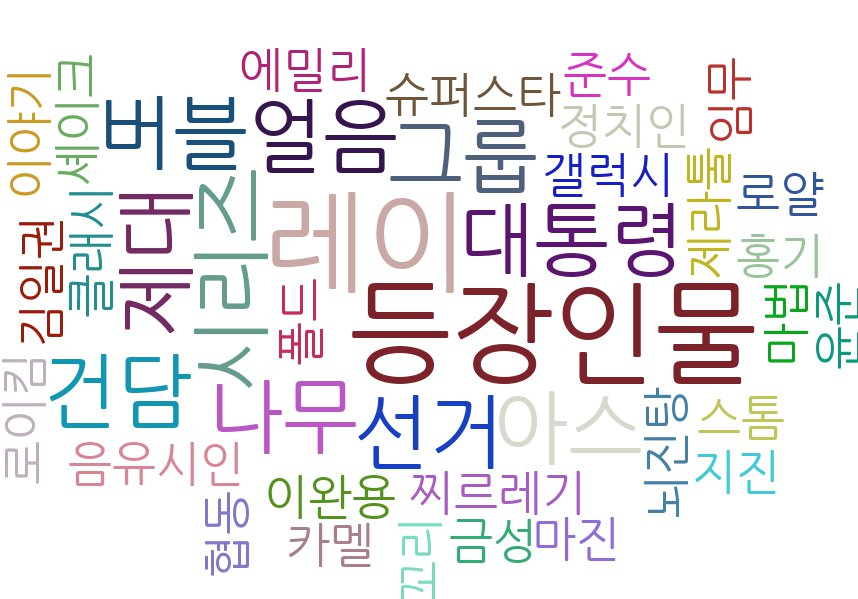

In [21]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

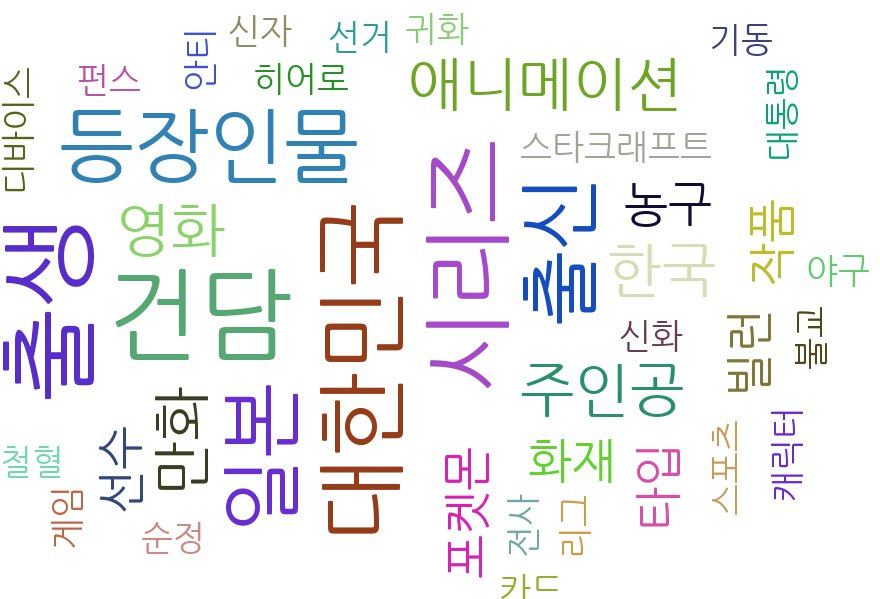

In [22]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')